# FoodHub Data Analysis


### Context
The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Metadata

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing necessary libraries

In [2]:
#libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
#Reading the data on CSV file
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# Using info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
#Replacing not rated order with NaN to allow further statistics with respect to rating
df["rating"].replace(to_replace="Not given", value=np.nan, inplace=True)
df["rating"]=df["rating"].astype(float)

In [6]:
#Geting the total number of not rated orders
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
* The dataset consist of 1898 registers and 9 fields. There are no missing values in any field, nevertheless, rating is an object dtype field which means there are more than only integers in the field.

* There are 736 non-rated orders described as "Not given" instead of a number in the "rating" field. Hence, not rated orders described as "Not given" are replaced by NaN that allows further statistics regarding to rating.

* We can see that there is only one column with a float data type (cost_of_the_order), four columns consisting of integer numbers (order_id, customer_id, food_preparation_time, delivery_time) and four columns of object data type (restaurant_name, cuisine_type, day_of_the_week, rating). 

### Checking the statistical summary of the data. 

It is separated into statistical summary for numerical and
categorical variables in order to get a better understanding.

Here we are not considering the customer_id and order_id columns since
it does not provide meaningful insight, at least at this stage.

In [7]:
#Using describe() functiion to get statistical summary for numerical variables 
df[["cost_of_the_order","rating","food_preparation_time","delivery_time"]].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.0,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
rating,1162.0,4.344234,0.741478,3.00,4.00,5.00,5.0000,5.00
food_preparation_time,1898.0,27.371970,4.632481,20.00,23.00,27.00,31.0000,35.00
delivery_time,1898.0,24.161749,4.972637,15.00,20.00,25.00,28.0000,33.00


In [24]:
#Here the statistical summary for categorical variables.
df.describe(include='O').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351


#### Observations:
* As first insights, we can see that, overall, the minimum time to prepare an order is 20 minutes, and the maximum food preparation time is 35 minutes whilst the average time to prepare an order is around 27 minutes. 

* The cost of the orders varies a lot, being 4 dollars the minimum and 35 dollars the maximum cost of order.

* There are 178 restaurants in the dataset, being Shake Shack the restaurant with most orders. 
* As it is expected, weekends are the busiest days of the week.

Further analysis is given in the next section

### Exploratory Data Analysis (EDA)

### Univariate Analysis

Let's start the analysis visualizing the orders placed on the week. 

Text(0, 0.5, 'Total of orders')

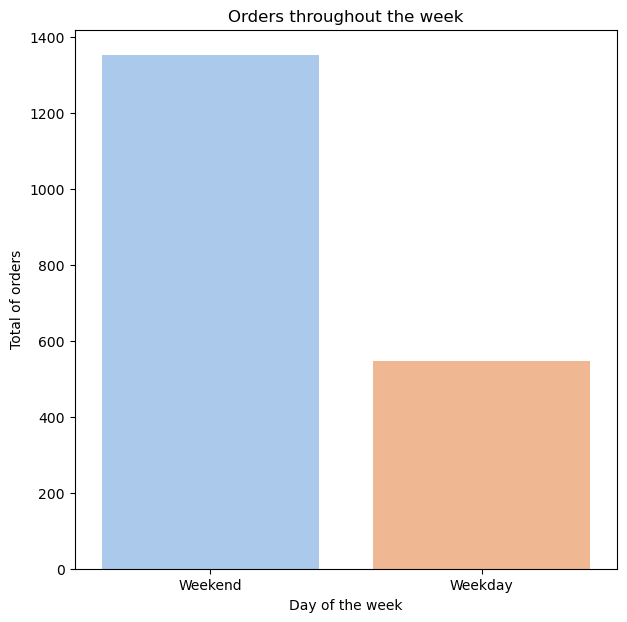

In [9]:
#Plotting the total number of orders with respect to the day of the week.
plt.figure(figsize = (7,7))
sns.countplot(data=df, x="day_of_the_week", palette = 'pastel')
plt.title('Orders throughout the week')
plt.xlabel('Day of the week')
plt.ylabel('Total of orders')

#### Observations: 
* As it is expected, weekends are the busiest days since there are more than twice the orders placed than on weekdays.

Next it is plotted the cost of orders. 

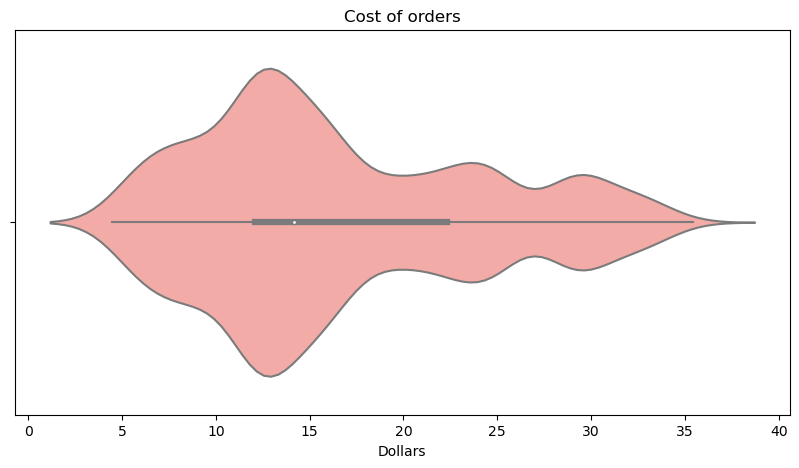

In [10]:
#Creating a violin plot to show a boxplot and the distribution of data.
plt.figure(figsize = (10,5))
sns.violinplot(data=df, x="cost_of_the_order", color = '#ff9f9b')
plt.title('Cost of orders')
plt.xlabel('Dollars')
plt.show()

In [11]:
#Getting the percentage of orders above 20 dollars
(df["cost_of_the_order"]>20).value_counts(normalize=True)

False    0.707587
True     0.292413
Name: cost_of_the_order, dtype: float64

#### Observations: 
* As it is shown above, the cost of orders follows a right-skewed distribution. 
* The violin plot also shows that 50% of the cost of orders lies between 12 and 22 dollars, whilst the median is 14 dollars.
* Only 29% of the orders cost above 20 dollars

Following with the analysis, it is plotted a histogram to visualize the food preparation time.

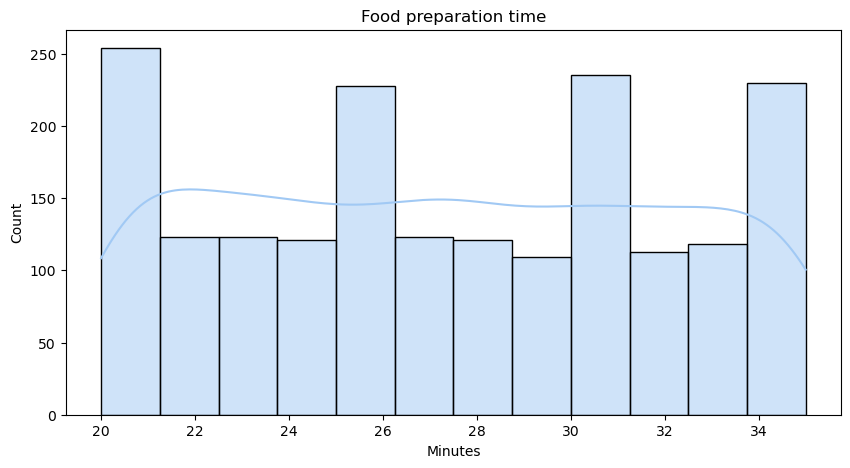

In [12]:
#Creating a histogram to visualize the food prep time distribution
plt.figure(figsize = (10,5))
sns.histplot(data=df,x="food_preparation_time",kde=True, color = '#a1c9f4')
plt.title('Food preparation time')
plt.xlabel('Minutes')
plt.show()

#### Observations: 
* The data tends to follow a uniform distribution, taking values from 20 to 35 minutes, as it is shown in the histogram.
* The median and the mean are aproximately equal to 27 minutes.

Next, it is visualized the delivery time across the whole week.

Text(0.5, 0, 'Minutes')

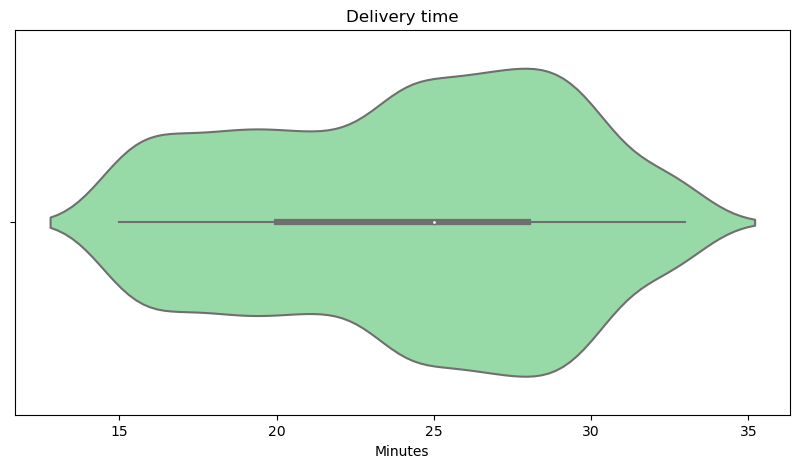

In [13]:
#Making a violin plot to show the distribution and quantiles of the data
plt.figure(figsize=(10,5))
sns.violinplot(data=df,x= "delivery_time", color = '#8de5a1')
plt.title('Delivery time')
plt.xlabel('Minutes')

#### Observations: 
* In this case the data follows a slightly left-skew distribution. 
* As it was previously discussed, weekends are the busiest days, thus we would expect the delivery time to be considerably affected by the day of the week. 

We could get an idea of what customers prefer by plotting the most ordered cuisines. 

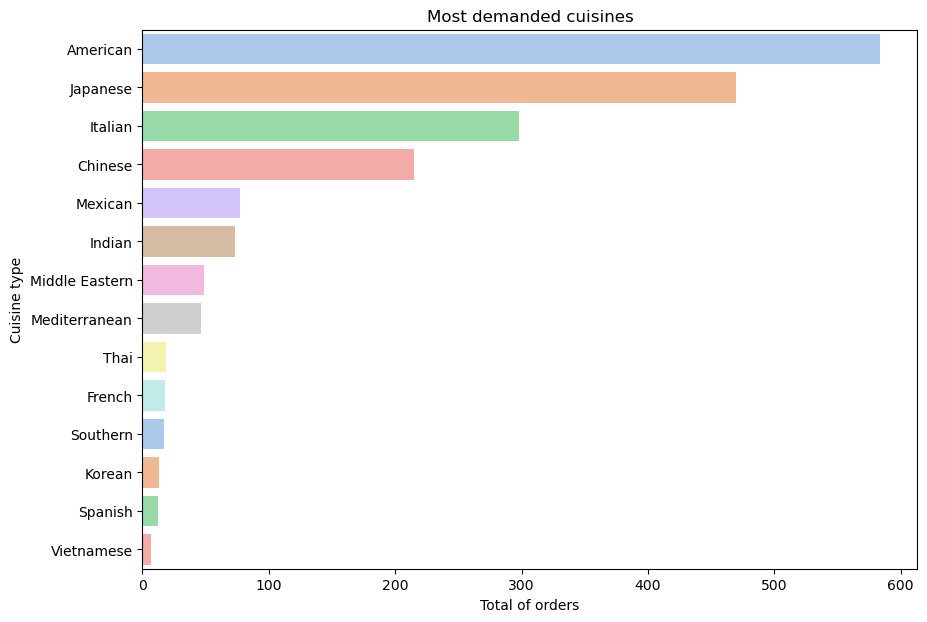

In [14]:
#Creating a list with the sorted cuisine by total of orders
cui_ord = df['cuisine_type'].value_counts().index.tolist()

#Plotting the orders placed for each cuisine 
plt.figure(figsize=(10,7))
sns.countplot(data=df,y="cuisine_type", order = cui_ord, palette = 'pastel')
plt.title('Most demanded cuisines')
plt.ylabel('Cuisine type')
plt.xlabel('Total of orders')
plt.show()

In [15]:
#Does the top demanded cuisine varies depending on the day?
df.groupby(["day_of_the_week"], as_index=False)["cuisine_type"].value_counts()

,day_of_the_week,cuisine_type,count
0,Weekday,American,169
1,Weekday,Japanese,135
2,Weekday,Italian,91
3,Weekday,Chinese,52
4,Weekday,Mexican,24
5,Weekday,Indian,24
6,Weekday,Middle Eastern,17
7,Weekday,Mediterranean,14
8,Weekday,Southern,6
9,Weekday,French,5


#### Observations: 
* American, Japanese, Italian, Chinese and Mexican are the top 5 ordered cuisines.
* The demand of different cuisines does not vary signicantly on the week.

Let's see what are the most popular restaurants.

In [16]:
#The restaurants are sorted by the total amount of orders received.
df["restaurant_name"].value_counts(normalize=True).head()

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
Name: restaurant_name, dtype: float64

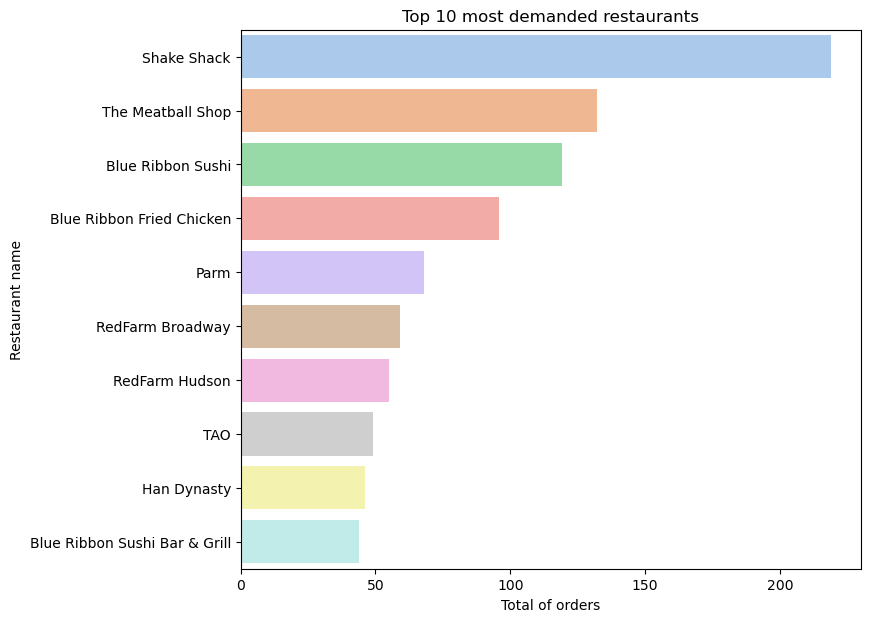

In [17]:
#Making a serie with the total orders placed on each restaurant
rest = df['restaurant_name'].value_counts()

#Plotting the top 10 most popular restaurants
plt.figure(figsize=(8,7))
sns.barplot(x=rest[:10].values, y=rest[:10].index, palette = 'pastel')
plt.title('Top 10 most demanded restaurants')
plt.ylabel('Restaurant name')
plt.xlabel('Total of orders')
plt.show()

#### Observations: 
* Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 most ordered restaurants from 178 restaurants.
* Only Shake Shack takes 11% of all orders.

It is time to consider the rating given on the orders. 

In [91]:
df['rating'].value_counts(normalize=True)

5.0    0.506024
4.0    0.332186
3.0    0.161790
Name: rating, dtype: float64

Text(0.5, 0, 'Rating')

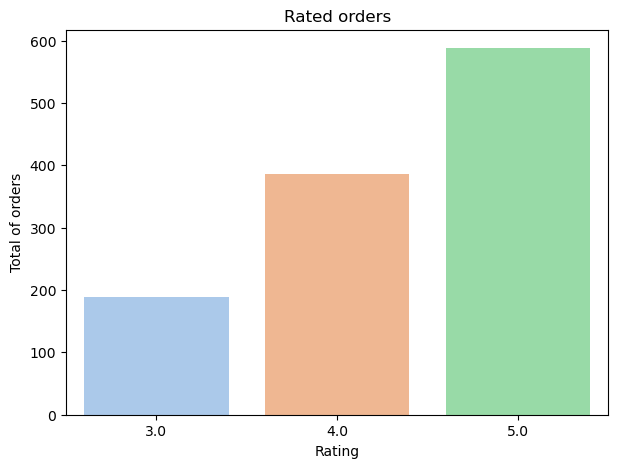

In [57]:
#Ploting the rating orders
plt.figure(figsize=(7,5))
sns.countplot(data=df,x="rating", palette ='pastel')
plt.title('Rated orders')
plt.ylabel('Total of orders')
plt.xlabel('Rating')

#### Observations:
* Ploting the rating of all orders shows that most of the orders are rated 5, whilst 33% are rated 4 and 16% are rated 3.
* Rating is exepected to be a feedback for the whole experience (tastiness, delivery time, etc.)

### Multivariate Analysis

Next it is time to see how different variables are related in order to get meaningful insights.

Text(0.5, 1.0, 'Correlation matrix')

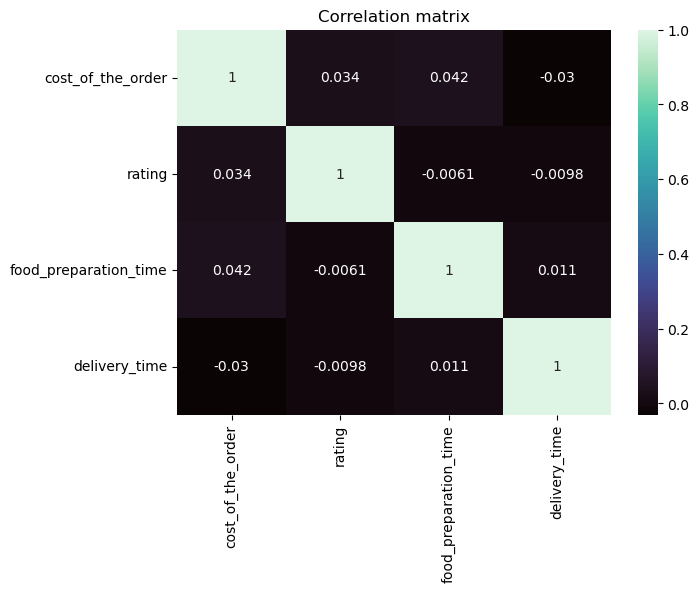

In [92]:
# Plotting a heatmap for the correlation matrix
num_var = df[["cost_of_the_order","rating","food_preparation_time","delivery_time"]]
plt.figure(figsize=(7,5))
sns.heatmap(data=num_var.corr(), annot =True, cmap = 'mako')
plt.title('Correlation matrix')

#### Observations: 
* Visualizing correlation between variables with a heatmeap there is no clear relation between numerical variables

Let's see how delivery time changes with respect to the day of the week

In [86]:
# Printing statistical summary for the delivery time across the week
df.groupby("day_of_the_week")["delivery_time"].describe()

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,28.340037,2.891428,24.0,26.0,28.0,31.0,33.0
Weekend,1351.0,22.470022,4.628938,15.0,18.5,22.0,27.0,30.0


Text(0.5, 0, 'Minutes')

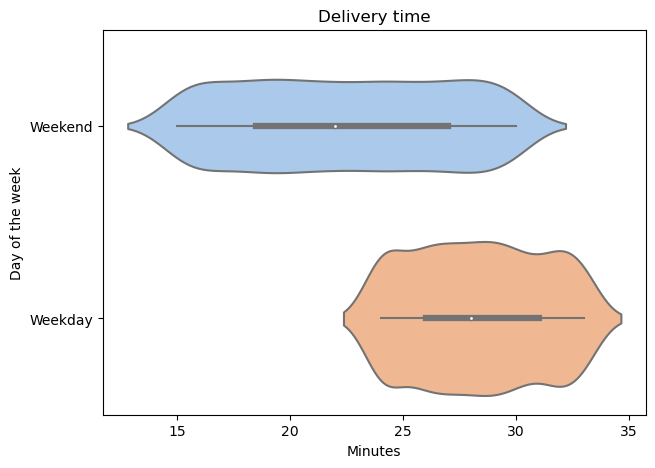

In [31]:
# Creating a violin plot to show a boxplot and the form of the distribution
plt.figure(figsize=(7,5))
sns.violinplot(data=df,x="delivery_time",y="day_of_the_week", palette='pastel')
plt.title('Delivery time')
plt.ylabel('Day of the week')
plt.xlabel('Minutes')

#### Observations: 
* Delivery time varies considerably between weekdays and weekends. 
* On weekdays the delivery time is between 24 and 33 minutes, while on weekends the delivery time goes from 15 to 30 minutes.
* On weekdays the mean delivery time, (around 28 minutes), is greater than on weekends (around 22 minutes).
* It is also shown that on weekends the delivery time has a greater standard deviation compared to weekdays.
* On both cases, the time distribution tends to follow a uniform distribution.

Different type of cuisine has different ingredients, cooking methods, etc., thus changing the price of the meals offered. 

In [36]:
# Printing statistical summary for the cost of order depending on the cuisine
df.groupby("cuisine_type")["cost_of_the_order"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,16.319829,7.462290,4.71,12.0800,14.120,22.2600,33.18
Chinese,215.0,16.305209,7.631503,4.75,12.1050,14.120,21.8800,34.19
French,18.0,19.793889,6.508990,11.98,13.0525,20.470,23.6550,29.25
Indian,73.0,16.919726,7.897493,5.34,11.6400,16.150,24.2000,33.03
Italian,298.0,16.418691,7.268831,5.05,12.0800,14.480,22.2600,33.03
Japanese,470.0,16.304532,7.422722,4.47,12.0800,14.070,21.8300,33.37
Korean,13.0,14.001538,7.563540,5.77,11.8400,12.180,14.0200,30.75
Mediterranean,46.0,15.474783,7.604720,5.67,12.0925,13.995,18.7825,35.41
Mexican,77.0,16.933117,7.555108,4.85,12.0800,15.570,22.3600,33.32


Text(0.5, 0, 'Dollars')

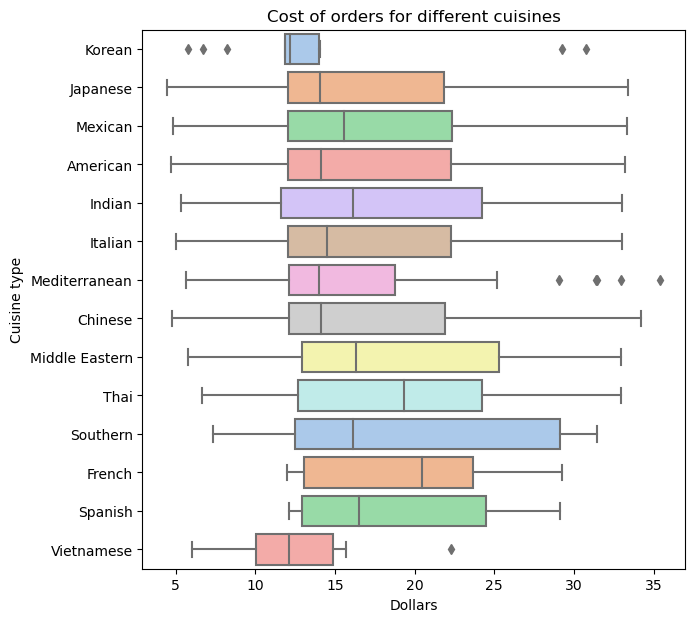

In [170]:
# Visualizaing cost variation regarding the cuisine with box plots
plt.figure(figsize=(7,7))
sns.boxplot(data=df, y="cuisine_type", x="cost_of_the_order", palette= 'pastel')
plt.title('Cost of orders for different cuisines')
plt.ylabel('Cuisine type')
plt.xlabel('Dollars')


#### Observations: 
* In terms of cost of orders, Vietnamese and Korean cuisine are the cheapest with a median of around 12 and 14 dollars, respectively, with some exceptions, posibly indicating special dishes that are more expensive. 
* On the other hand, French and Thai could be considered as the most expensive cuisines with a median of 20.4 and 19.3 dollars, respectively. 


As well as with cost of orders, we would expect the cuisine type to affect the food preparation time.

In [27]:
# Printing statistical summary for the prep time depending on the cuisine
df.groupby("cuisine_type")["food_preparation_time"].describe()

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,27.440068,4.658474,20.0,23.00,27.0,31.0,35.0
Chinese,215.0,27.511628,4.758525,20.0,23.50,27.0,32.0,35.0
French,18.0,26.888889,5.039712,21.0,22.50,25.5,31.0,35.0
Indian,73.0,27.109589,4.620491,20.0,23.00,27.0,31.0,35.0
Italian,298.0,27.483221,4.519474,20.0,23.00,28.0,31.0,35.0
Japanese,470.0,27.510638,4.604496,20.0,24.00,27.5,32.0,35.0
Korean,13.0,25.461538,3.971049,20.0,23.00,25.0,26.0,33.0
Mediterranean,46.0,27.000000,4.908043,20.0,23.00,27.0,31.0,35.0
Mexican,77.0,26.727273,4.604450,20.0,23.00,26.0,31.0,35.0


Text(0.5, 0, 'MInutes')

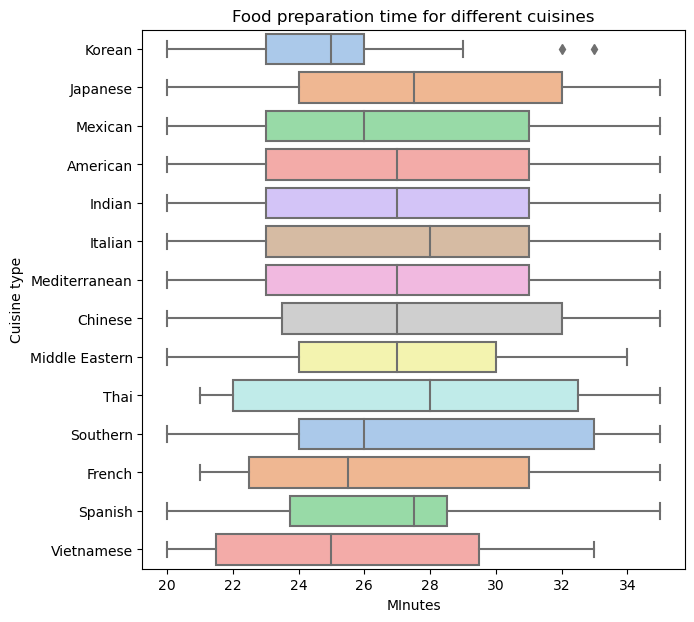

In [82]:
# Plotting food prep time variation across the cuisine types
plt.figure(figsize=(7,7))
sns.boxplot(data=df, y="cuisine_type", x="food_preparation_time", palette='pastel')
plt.title('Food preparation time for different cuisines')
plt.ylabel('Cuisine type')
plt.xlabel('MInutes')


#### Obseravations: 
* In terms of food preparation time, Korean cuisine has the thightest preparation time that goes from 20 to 33 minutes, with a standard deviation of 3.97 minutes and a median of 25 minutes. 
* On the other hand, Thai cuisine has the wider preparation time as it has a standard deviation of 5.5 minutes and a mean of 27 minutes.  

Let's find out if the delivery time has an impact on orders rating. 

In [85]:
# Printing statistical summary for the rating respecting delivery time
df.groupby("rating")["delivery_time"].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3.0,188.0,24.558511,4.652845,15.0,21.0,25.0,28.0,33.0
4.0,386.0,23.867876,4.923377,15.0,20.0,24.0,28.0,33.0
5.0,588.0,24.212585,5.018607,15.0,20.0,25.0,28.0,33.0


Text(0.5, 0, 'Rating')

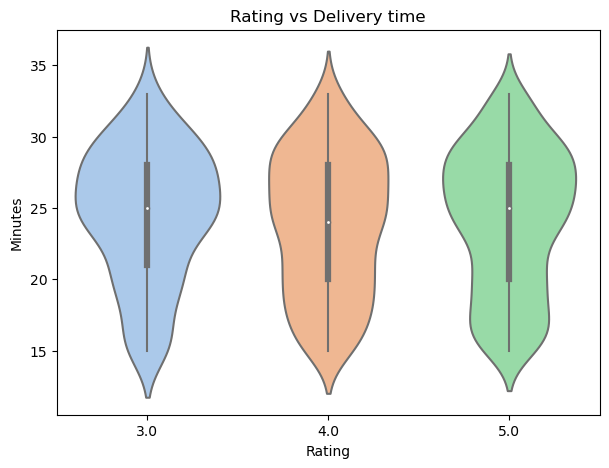

In [73]:
# Plotting rating with respect to delivery time
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x="rating",y="delivery_time", palette='pastel')
plt.title('Rating vs Delivery time')
plt.ylabel('Minutes')
plt.xlabel('Rating')


#### Observations:
* Delivery time has no significant impact in the rating of the order as it is shown in the figure.

In [31]:
# Statistical summary for rating vs cost of order
df.groupby("rating")["cost_of_the_order"].describe()

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3.0,188.0,16.223351,7.840886,4.75,12.0425,14.120,21.8300,33.37
4.0,386.0,16.710337,7.632996,4.75,12.1300,14.160,22.7875,35.41
5.0,588.0,16.965697,7.448696,4.47,12.1300,15.205,22.8000,33.03


Text(0.5, 0, 'Rating')

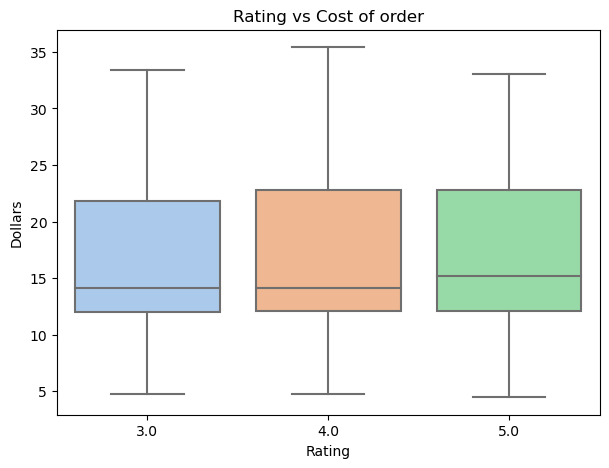

In [74]:
# Creating a plot for the rating respecting its cost
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x="rating",y="cost_of_the_order",palette ='pastel')
plt.title('Rating vs Cost of order')
plt.ylabel('Dollars')
plt.xlabel('Rating')


#### Observations:
* Cost of order has no significant impact in the rating of the order as it is shown in the figure.

### The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. 

In [32]:
'''
The data is grouped by the rating of each restaurant such that if
for each restaurant its mean rating is greater than 4 and its ratings sum
is greater than 50 it is printed True along the name of the restaurant.
'''
rt = df.groupby(["restaurant_name"])["rating"].apply(lambda x: "True" if ((x.mean()>4) & (x.sum()>50)) else 'False')
rt.sort_values(ascending=False).head(30)


restaurant_name
Five Guys Burgers and Fries               True
Jack's Wife Freda                         True
The Meatball Shop                         True
Cafe Mogador                              True
The Smile                                 True
Han Dynasty                               True
Tamarind TriBeCa                          True
TAO                                       True
Sushi of Gari Tribeca                     True
Blue Ribbon Sushi Izakaya                 True
Blue Ribbon Sushi Bar & Grill             True
Blue Ribbon Sushi                         True
Blue Ribbon Fried Chicken                 True
Sushi of Gari 46                          True
Parm                                      True
J. G. Melon                               True
RedFarm Broadway                          True
Rubirosa                                  True
ilili Restaurant                          True
Momoya                                    True
Nobu Next Door                            Tr

#### Observations:
As it can be observed there are 25 restaurants that fit under the criteria of average rating above 4 and a rating count above 50. 

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [33]:
'''
Creating a list of comprehension across the cost of all orders
with the required conditional statement.
'''
rev = sum([x*0.25 if x > 20 else x*0.15 if x>5 else 0 for x in df["cost_of_the_order"]])
print("Total revenue:",rev, "dollars")


Total revenue: 6166.302999999994 dollars


#### Observations:
The company generated a total revenue of 6166.31 dollars applying the fee criteria for all the orders placed. 

### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed?

In [76]:
'''
food_preparation_time and delivery_time columns are added such that 
it is determined orders that took more than 60 minutes in total to be delivered
'''
((df["food_preparation_time"] + df["delivery_time"])>=60).value_counts(normalize=True)*100

False    87.091675
True     12.908325
dtype: float64

#### Observations:
The percentage of orders that take more than 60 minutes is 12.9%.


### Conclusions:
*  Overall, by just looking at the rating, the quality of food offered by the restaurants are good since the rating in 75% of the orders are above 4, with only 25% between 3 and 4, and with no orders rated below 3. 
* Nevertheless, rating seems to have no correlation with any of the variables, possibly indicating that it might be affect by other variables that are not considered in the dataset or that just customers do not give precise feedback. 

### Recommendations:

*  The main thing to enhance customer experience might be the delivery time. Since there is significant difference in the delivey time through the week, it might be a good idea to get more delivery persons in order to get similar distributions on weekdays and weekends, as well as to shorten the time the customer has to wait for the order. 

* Regarding the revenue made by the company, it can be higher if the charge to the cost of orders is applied different. Instead of charging 25% to orders costing above 20 dollars it could be charged 25% to orders costing more than 14 dollars and charge 15% to orders that cost more than 5 dollars. The reason behind is because the median of the cost of orders is around 14 dollars, meaning that 50% of the most expensive orders costs more than 14 dollars. Hence, the objective is to cover more of the range of the most expensive orders resulting in a greater revenue.

* Finally, another recommendation would be to encourage customers to rate their orders by offering rewards. This would attack the missing rated orders in the dataset and it might also improve its relevance on the analysis. 





---